# Decision Tree on Company Data

<h3> Import all the required libraries </h3>

In [1]:
#<h3> Import all the required libraries </h3>
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
import matplotlib.pyplot as plp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

# EDA

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#size of the overall dataset
df.shape

(400, 11)

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

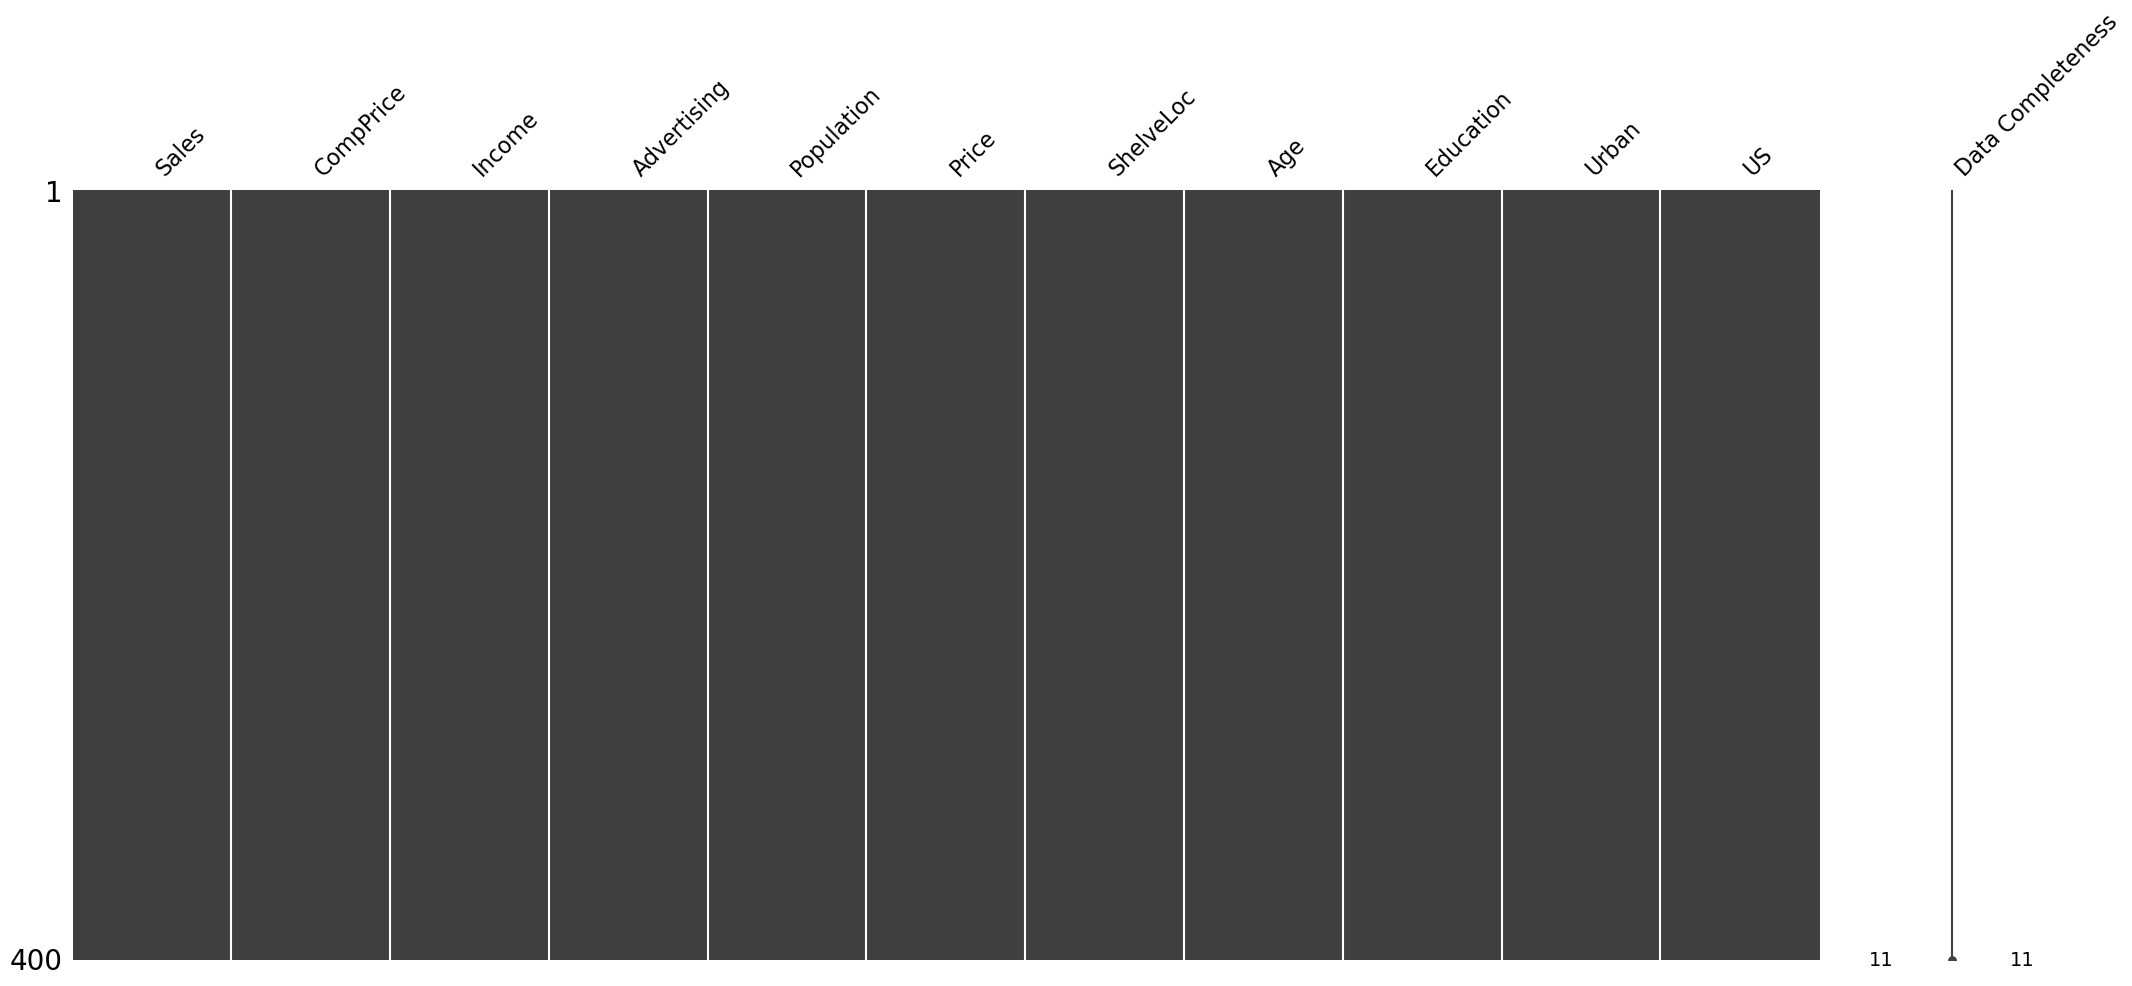

In [4]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [5]:
#different datatypes in dataframe
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df['Urban']=LabelEncoder().fit_transform(df['Urban'])
df['US']=LabelEncoder().fit_transform(df['US'])
df['ShelveLoc']=LabelEncoder().fit_transform(df.ShelveLoc)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


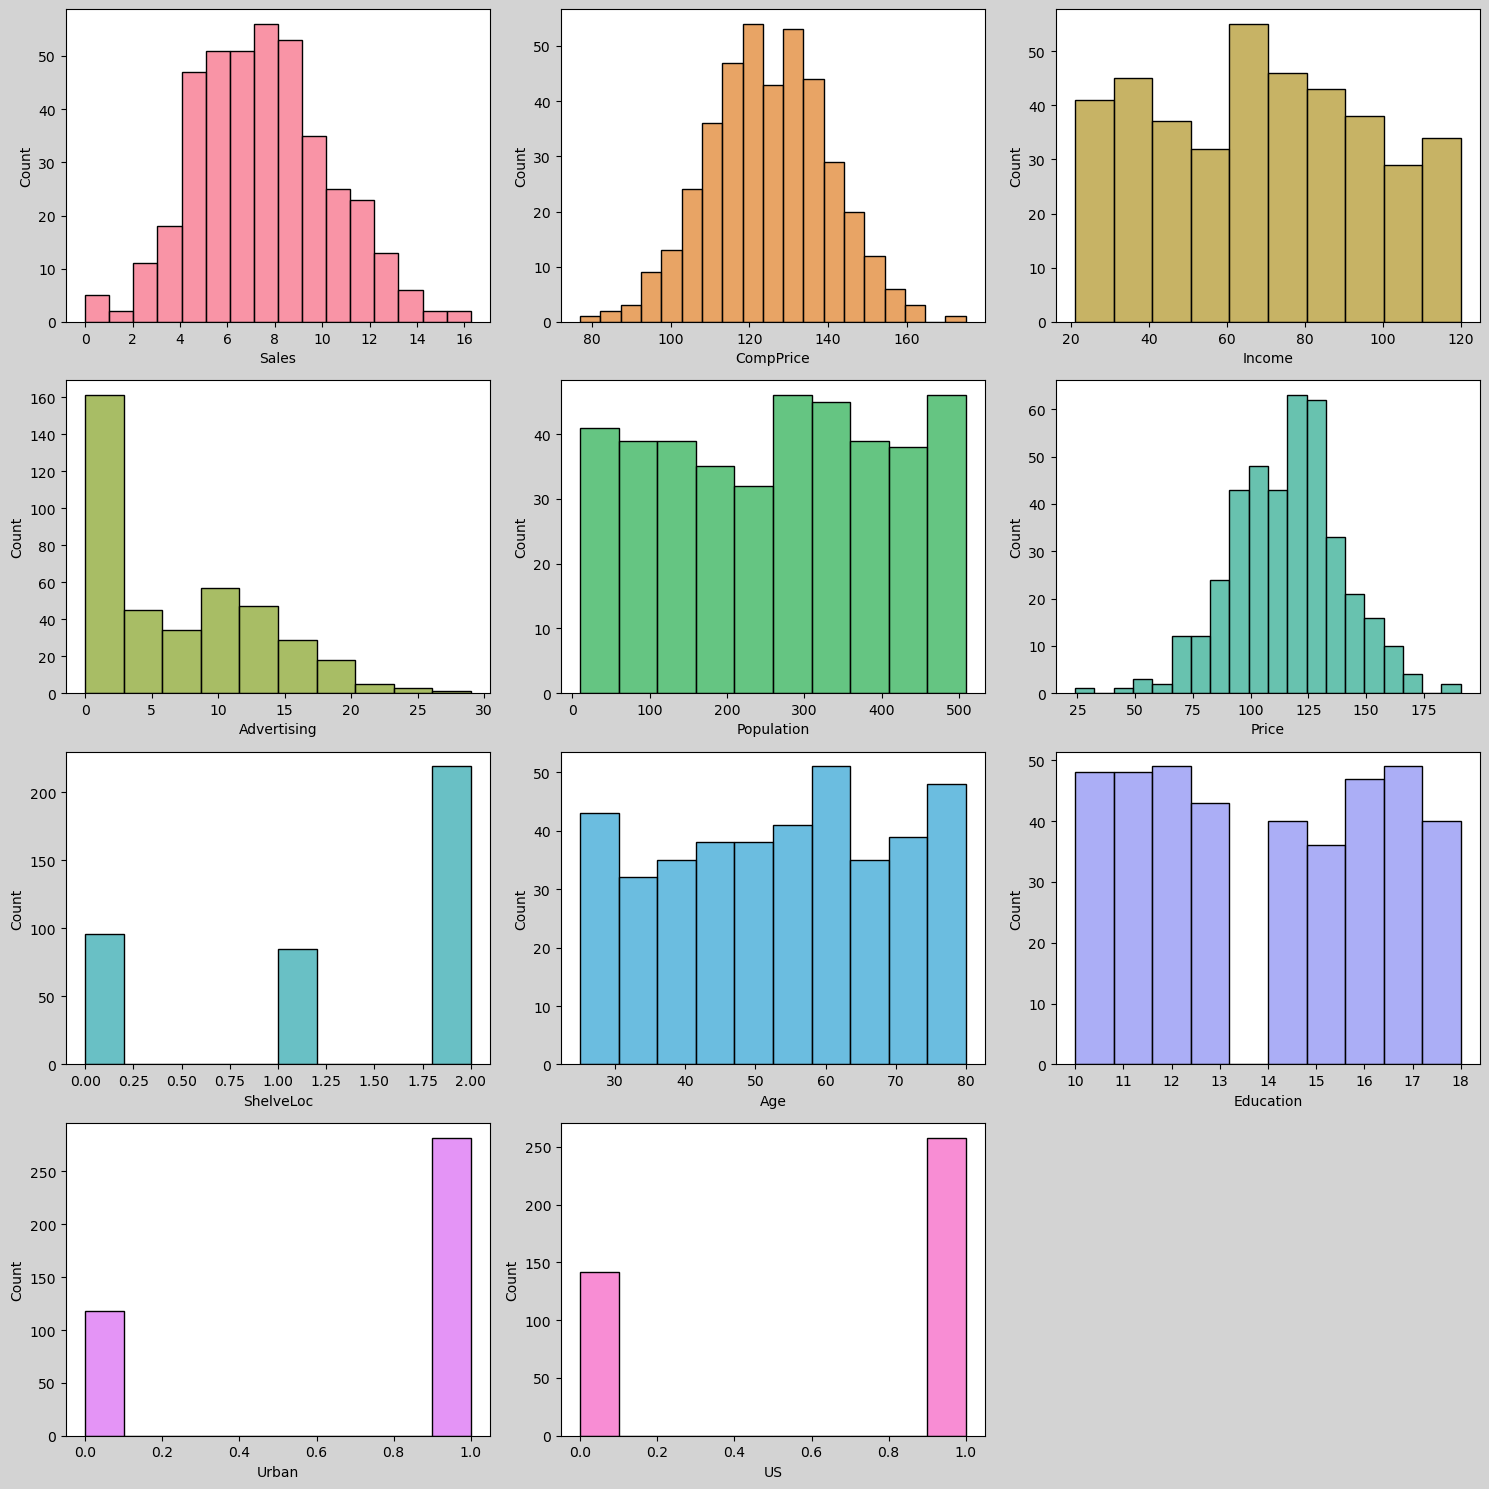

In [8]:
import matplotlib.pyplot as plt
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

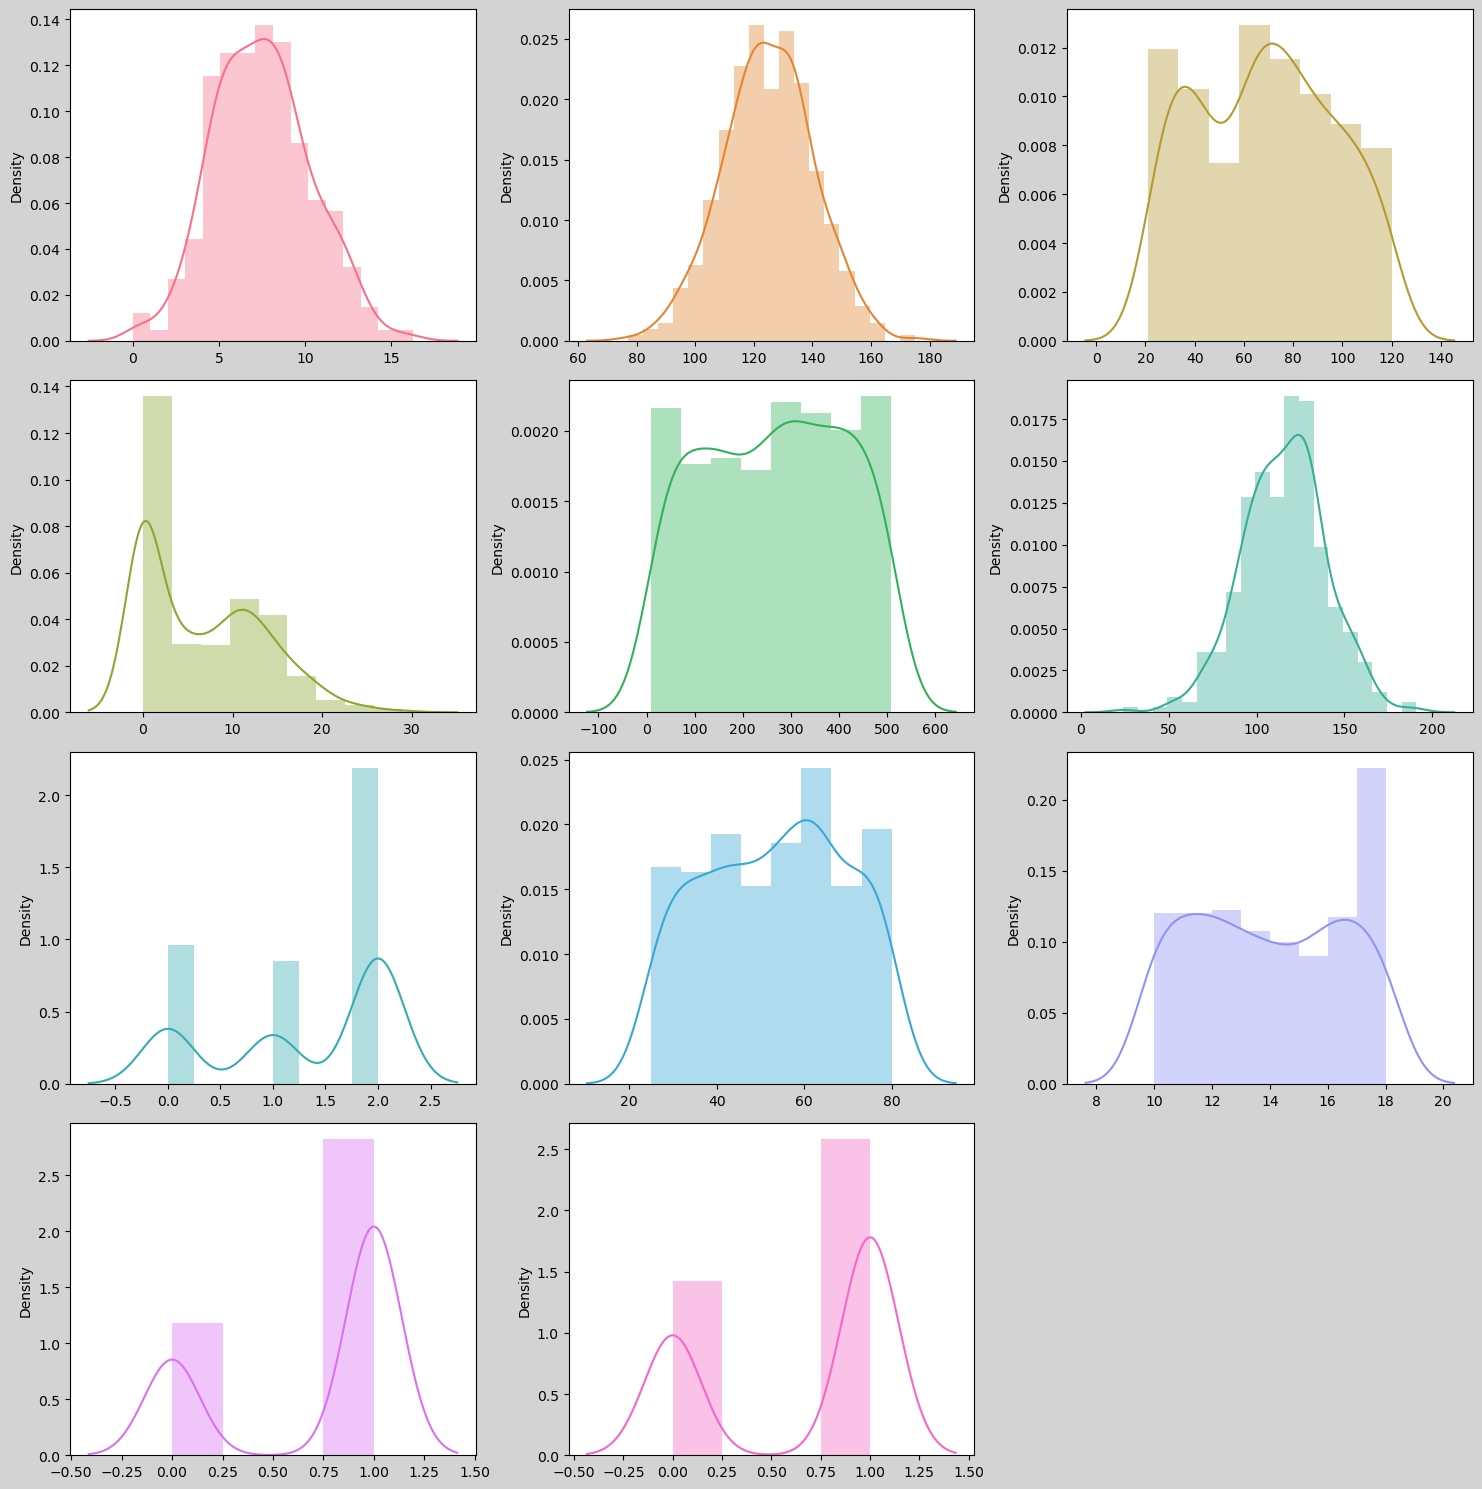

In [9]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

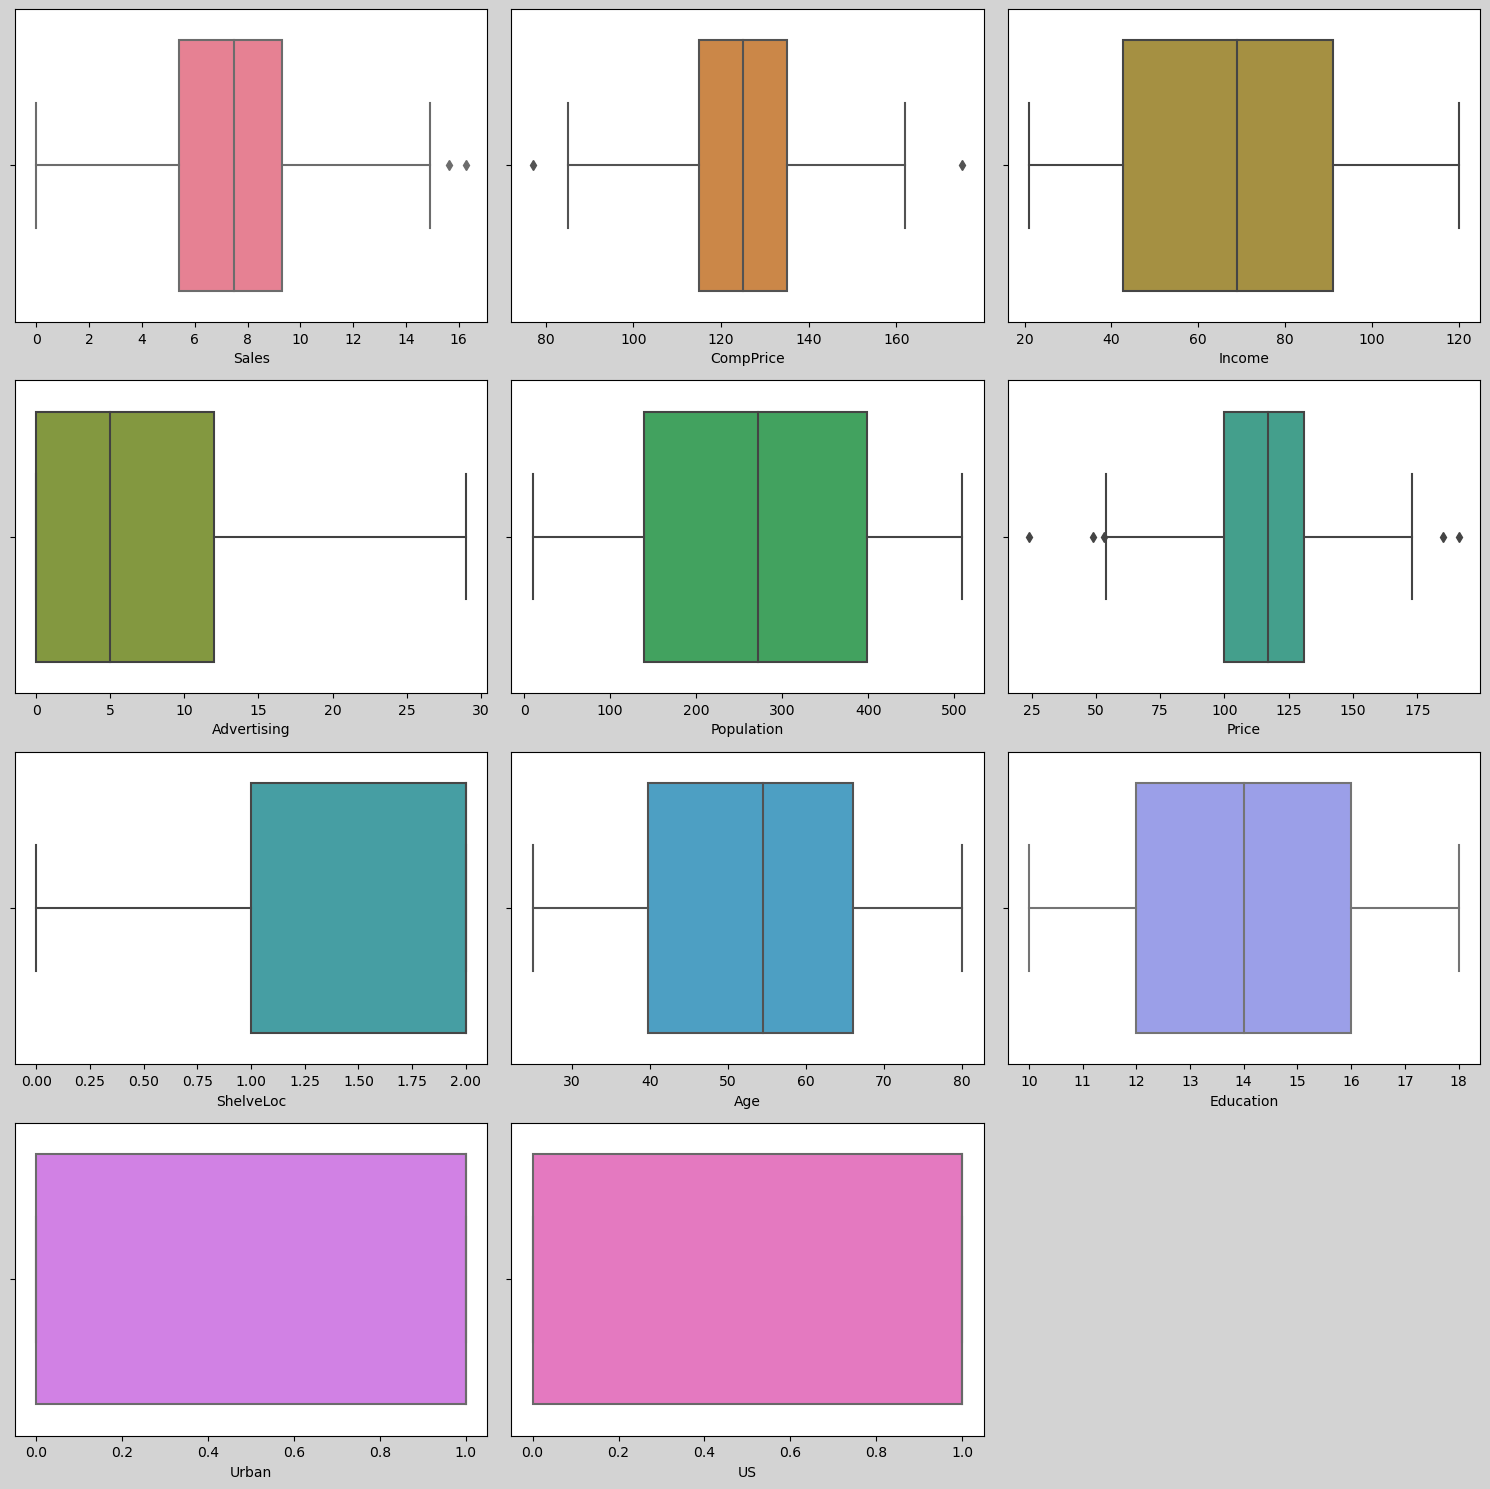

In [10]:
#performing univerent analysis
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


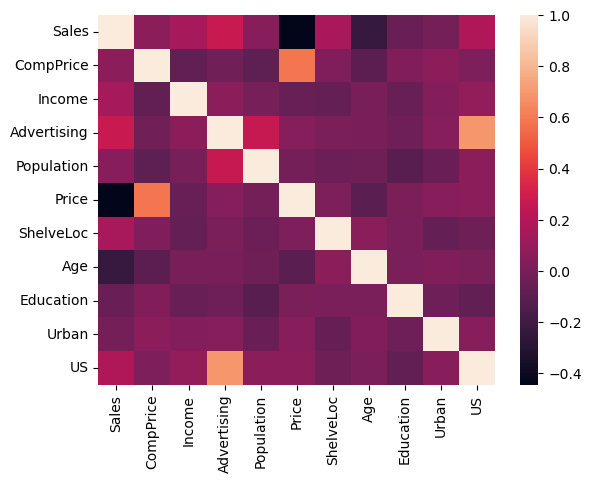

In [11]:
sns.heatmap(df.corr())
df.corr()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
ShelveLoc,400.0,1.307500,0.833475,0.0,1.00,2.00,2.00,2.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00
Urban,400.0,0.705000,0.456614,0.0,0.00,1.00,1.00,1.00


In [13]:
#now we need to calculate the sales 
df['sales']=0#here sales refers to be low
df.loc[df['Sales']>7.49,"sales"]=1#here the sales is high
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [14]:
df.drop(["Sales"],axis=1,inplace=True)


In [15]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [22]:
from sklearn.preprocessing import minmax_scale
x=df.iloc[:,0:-1]
x=minmax_scale(x)
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [23]:
model=DecisionTreeClassifier( criterion="entropy",max_depth=4).fit(X_train,y_train)
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
ypred=model.predict(X_test)
print('test accuracy of the model',accuracy_score(y_test,ypred)*100)

test accuracy of the model 65.83333333333333


In [25]:
model.feature_importances_

array([0.        , 0.09092625, 0.2130403 , 0.04853787, 0.29864252,
       0.28683783, 0.03794888, 0.02406635, 0.        , 0.        ])

In [16]:
#now lets create the model by changing the critera as 'gini'

In [43]:
model=DecisionTreeClassifier( criterion="gini",max_depth=3).fit(X_train,y_train)
ypred=model.predict(X_test)
print('test accuracy of the model',accuracy_score(y_test,ypred)*100)


test accuracy of the model 70.83333333333334


In [44]:
new_df=pd.DataFrame({'Actual':y_test,'predicted':ypred})
new_df

,Actual,predicted
97,0,0
90,0,0
52,1,0
153,0,0
28,0,0
...,...,...
70,1,1
351,1,0
254,1,1
299,1,1


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        62
           1       0.76      0.59      0.66        58

    accuracy                           0.71       120
   macro avg       0.72      0.70      0.70       120
weighted avg       0.72      0.71      0.70       120



<AxesSubplot:>

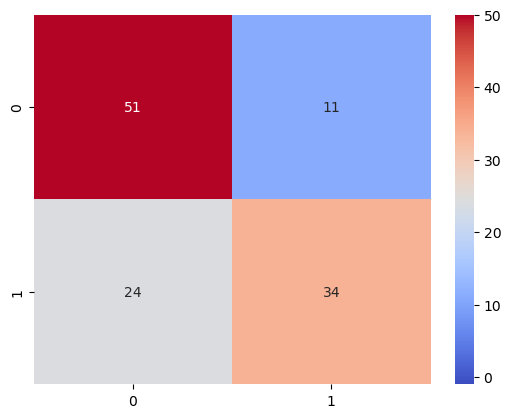

In [46]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred), vmin = -1, vmax = +50, annot = True, cmap = 'coolwarm')

<Figure size 3000x1000 with 0 Axes>

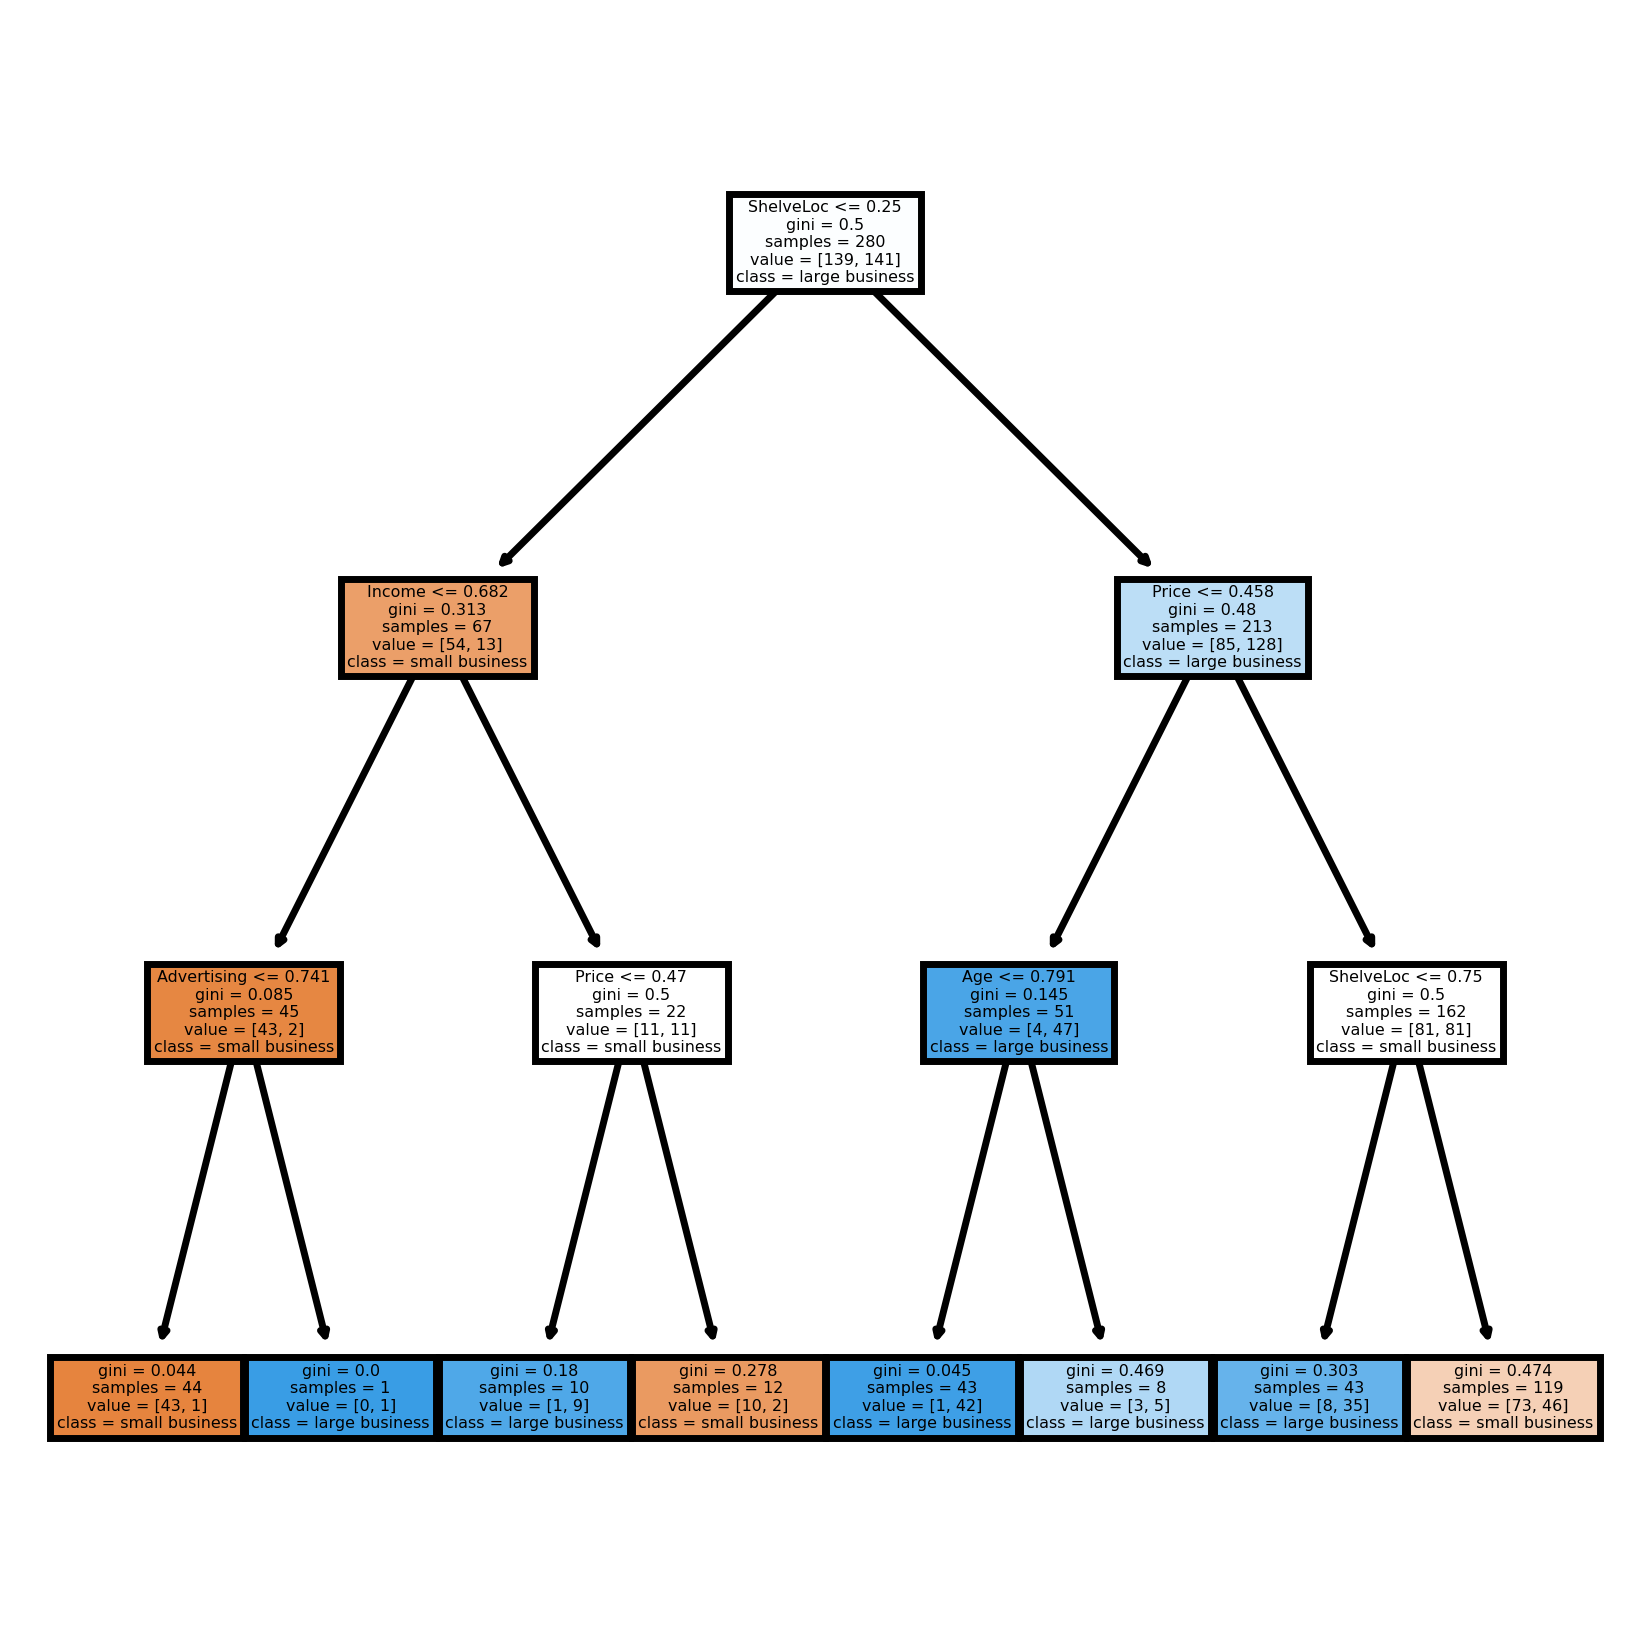

In [28]:
from sklearn import tree
plp.figure(figsize=(30,10))
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] #.columns
cn=['small business','large business']    #.value_count.keys
fig, axes = plp.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [47]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution
pd.Series(y_resampled).value_counts()

0    141
1    141
Name: sales, dtype: int64

In [48]:
model=DecisionTreeClassifier( criterion="gini",max_depth=3).fit(X_resampled, y_resampled)
ypred=model.predict(X_test)
print('test accuracy of the model',accuracy_score(y_test,ypred)*100)


test accuracy of the model 71.66666666666667


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        62
           1       0.73      0.66      0.69        58

    accuracy                           0.72       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.72      0.72      0.72       120



<AxesSubplot:>

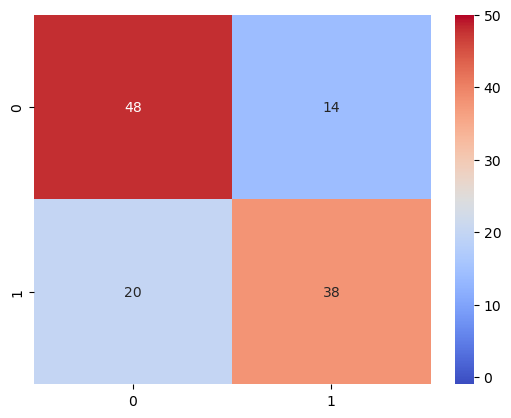

In [51]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred), vmin = -1, vmax = +50, annot = True, cmap = 'coolwarm')